In [1]:
# import functions from ../definitions/definitions_EDA
from datetime import datetime, timedelta
import sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
sys.path.append('../definitions')
import definitions_EDA as eda
# import definitions_plotting as def_plot
from scipy.fft import fft, ifft, fftfreq
from scipy import signal
import shutil

Define Variables

In [2]:
start_date = '2024-03-29'
end_date = '2024-03-30'
start_day_control = '2024-03-23'
end_day_control = '2024-03-23'

Fetch data and store as dataframe

In [3]:
data_arr_mag = eda.process_data(eda.get_data('ctumag', eda.read_txt_file, start_date, end_date))
data_arr_squid = eda.process_data(eda.get_data('squid', eda.read_txt_file, start_date, end_date))
# print(f"Data array mag shape: \n {data_arr_mag.shape}")
# print(f"Data array mag head: \n {data_arr_mag.head()}")
df = eda.create_dataframe(data_arr_mag, data_arr_squid, start_date)
# print(f"Data frame shape: \n {df.shape}")
print(f"Data frame head: \n {df.head()}")


# Create control df
data_arr_mag_cntrl = eda.process_data(eda.get_data('ctumag', eda.read_txt_file, start_day_control, end_day_control))
data_arr_squid_cntrl = eda.process_data(eda.get_data('squid', eda.read_txt_file, start_day_control, end_day_control))
df_cntrl = eda.create_dataframe(data_arr_mag_cntrl, data_arr_squid_cntrl, start_day_control)
# print(f"Data frame control shape: \n {df_cntrl.shape}")

Data frame head: 
                          NS_SQUID  F_SQUID  NS_Fluxgate  EW_Fluxgate  \
Time                                                                   
2024-03-29 00:00:00.090  -98.7272 -84.6562   10964.9980     -71.4005   
2024-03-29 00:00:00.290  -98.7269 -84.7641   10965.0129     -71.3179   
2024-03-29 00:00:00.490  -98.7254 -84.7845   10965.0129     -71.3179   
2024-03-29 00:00:00.690  -98.7248 -84.7704   10965.0129     -71.3179   
2024-03-29 00:00:00.890  -98.7239 -84.7536   10965.0178     -71.3441   

                         Z_Fluxgate  
Time                                 
2024-03-29 00:00:00.090 -22662.5927  
2024-03-29 00:00:00.290 -22662.5824  
2024-03-29 00:00:00.490 -22662.5824  
2024-03-29 00:00:00.690 -22662.5824  
2024-03-29 00:00:00.890 -22662.6716  


Call functions in eda definitions

Number of discontinuities: 4


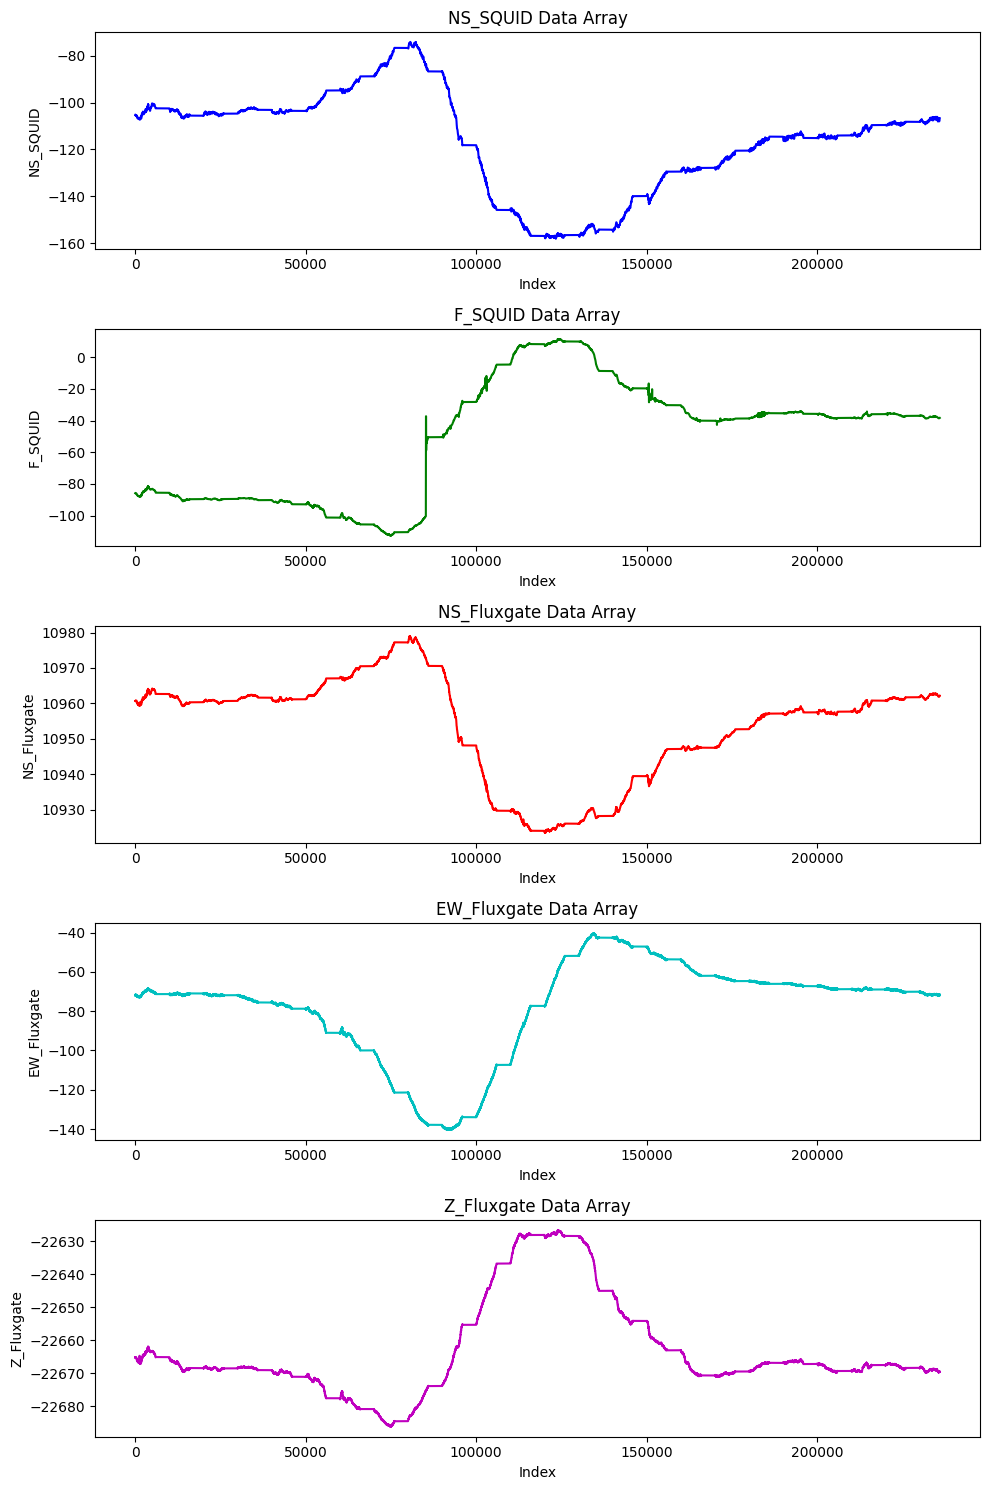

In [4]:
resampled_df = eda.resample_data(df, '1s')
discontinuities, threshold, df_cleaned = eda.discontinuity_check(resampled_df,df_cntrl)
eda.plot_cleaned_data(df_cleaned)
# eda.write_data_summary(df, threshold, discontinuities)

Fourier Transform

/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Code/Bigdata_Event_Detection/bigdata_detection/modules/../definitions/definitions_EDA.py:91: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/Users/tristan/Library/CloudStorage/OneDrive-StellenboschUniversity/Academics/Final_year/Semester 2/Skripsie/Code/Bigdata_Event_Detection/bigdata_detection/modules/../definitions/definitions_EDA.py:92: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xscale('log')


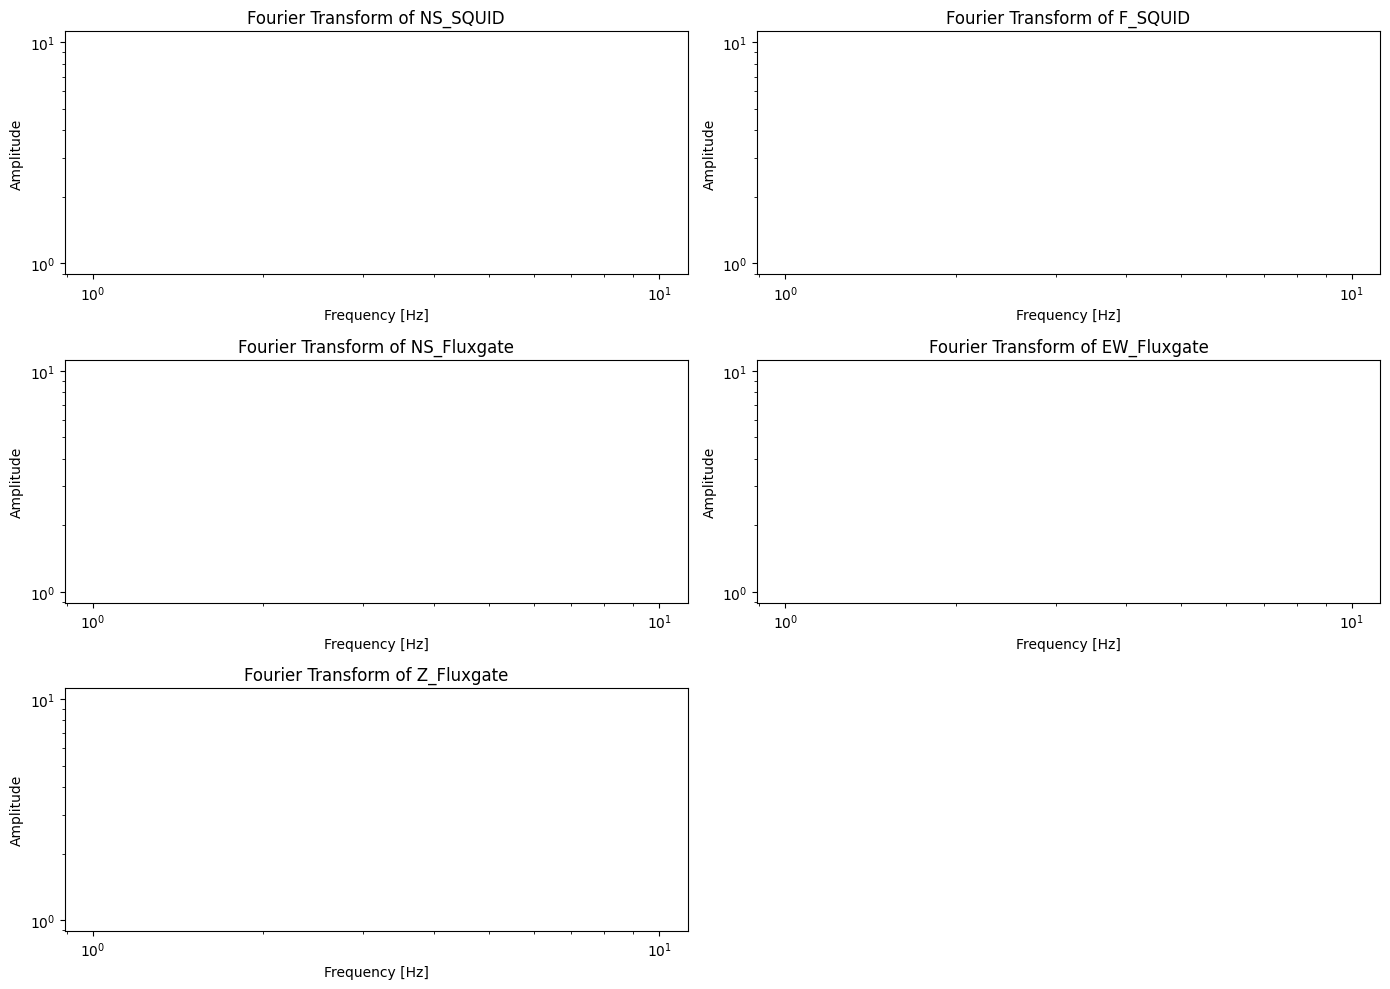

In [5]:
components, fourier_results = eda.calculate_fourier_transforms(resampled_df)
eda.plot_fourier_transform(fourier_results, components)